#**Tugas 4**

###**Encoder**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW/tugas4/hasil_prepros.csv")
df.head()

,judul,isi,tanggal,kategori,cleansing,case_folding,tokenize,stopword_removal
0,"Soft Tenis PON 2024 Dimulai, Keras Berebut Emas",Banda Aceh - Cabor Soft Tennis PON 2024 dimula...,"Rabu, 11 Sep 2024 23:15 WIB",Olahraga,Banda Aceh Cabor Soft Tennis PON dimulai Per...,banda aceh cabor soft tennis pon dimulai per...,"['banda', 'aceh', 'cabor', 'soft', 'tennis', '...",banda aceh cabor soft tennis pon persaingan ke...
1,220 Atlet Anggar Perebutkan Medali PON 2024,Jakarta - Cabang olahraga anggar pada Pekan Ol...,"Rabu, 11 Sep 2024 22:15 WIB",Olahraga,Jakarta Cabang olahraga anggar pada Pekan Ola...,jakarta cabang olahraga anggar pada pekan ola...,"['jakarta', 'cabang', 'olahraga', 'anggar', 'p...",jakarta cabang olahraga anggar pekan olahraga ...
2,NPC: Ada Peran Menpora di Balik Sukses Paralim...,Tangerang - National Paralympic Committee (NPC...,"Rabu, 11 Sep 2024 21:15 WIB",Olahraga,Tangerang National Paralympic Committee NPC I...,tangerang national paralympic committee npc i...,"['tangerang', 'national', 'paralympic', 'commi...",tangerang national paralympic committee npc in...
3,Hasil Hong Kong Open 2024: Chico Terdepak di B...,Hong Kong - Chico Aura Dwi Wardoyo mesti langs...,"Rabu, 11 Sep 2024 20:11 WIB",Olahraga,Hong Kong Chico Aura Dwi Wardoyo mesti langsu...,hong kong chico aura dwi wardoyo mesti langsu...,"['hong', 'kong', 'chico', 'aura', 'dwi', 'ward...",hong kong chico aura dwi wardoyo mesti langsun...
4,Hong Kong Open 2024: Gregoria Melaju ke Babak ...,Hong Kong - Gregoria Mariska Tunjung melaju ke...,"Rabu, 11 Sep 2024 19:15 WIB",Olahraga,Hong Kong Gregoria Mariska Tunjung melaju ke ...,hong kong gregoria mariska tunjung melaju ke ...,"['hong', 'kong', 'gregoria', 'mariska', 'tunju...",hong kong gregoria mariska tunjung melaju baba...


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df)


Nilai sebelum dan sesudah konversi:
{'Olahraga': 0, 'Otomotif': 1}

DataFrame setelah Label Encoding:
                                                judul  \
0     Soft Tenis PON 2024 Dimulai, Keras Berebut Emas   
1         220 Atlet Anggar Perebutkan Medali PON 2024   
2   NPC: Ada Peran Menpora di Balik Sukses Paralim...   
3   Hasil Hong Kong Open 2024: Chico Terdepak di B...   
4   Hong Kong Open 2024: Gregoria Melaju ke Babak ...   
5   Momen 14 Peraih Medali Paralimpiade dapat Bonu...   
6   Momen Jokowi Serahkan Bonus ke Peraih Medali P...   
7   Hong Kong Open 2024: Jonatan Menang Mudah, Tem...   
8   Hong Kong Open 2024: Dejan/Gloria Langsung Ter...   
9   Leani Ratri Langsung Bidik Paralimpiade 2028, ...   
10  Bioetanol Jadi Pendorong Pertumbuhan Ekonomi, ...   
11  Airlangga Bilang Mobil Hybrid Laris Tanpa Inse...   
12  Urgensi Pengembangan Bioetanol, Benarkah Lebih...   
13            Semarak Parade Pebalap MotoGP di Lombok   
14  Alex Marquez Terpesona Sirkuit Mandali

In [ ]:
# Menyimpan DataFrame ke file CSV
df.to_csv('clear_text_cuy.csv', index=False)

###**Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
x = df['stopword_removal']
y = df['kategori_encoded']

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     banda aceh cabor soft tennis pon persaingan ke...
1     jakarta cabang olahraga anggar pekan olahraga ...
2     tangerang national paralympic committee npc in...
3     hong kong chico aura dwi wardoyo mesti langsun...
4     hong kong gregoria mariska tunjung melaju baba...
5     jakarta peraih medali paralimpiade menerima bo...
6     presiden joko widodo jokowi menyerahkan bonus ...
7     hong kong jonatan christie menjejak babak hong...
8     hong kong dejan ferdinansyahgloria emanuelle w...
9     jakarta atlet badminton indonesia leani ratri ...
10    jakarta peneliti itb prof dr ronny purwadi pen...
11    jakarta menko bidang perekonomian airlangga ha...
12    jakarta semangat menekan emisi gas buang dipup...
13    mataram pebalap motogp mengikuti parade jalan ...
14    jakarta pebalap gresini racing alex marquez si...
15    jakarta permintaan mobil listrik indonesia men...
16    jakarta francesco bagnaia kesan tersendiri sir...
17    jakarta byd memperluas portofolio kendaraa

###**TF-IDF Weighting**

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf

,absen,abubakar,acara,aceh,acehsumut,acehsumutini,adakah,additional,adik,advance,...,wuling,xin,xxi,ya,yamaha,yuhsuanpada,yuk,zenix,zheng,zulfikar
0,0.036597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036597,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.032472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223717,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027777,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.04808,0.000000,0.041872,0.000000,0.000000,0.000000,0.000000,0.04808,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.058447,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.033573,0.000000,0.209293,0.201435,0.033573,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.100718,0.029237,0.000000,0.000000,0.000000,0.000000,0.00000,0.033573
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.040518,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.210224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036187,0.00000,0.000000


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,absen,abubakar,acara,aceh,acehsumut,acehsumutini,adakah,additional,adik,advance,...,wuling,xin,xxi,ya,yamaha,yuhsuanpada,yuk,zenix,zheng,zulfikar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

             Node  Degree Centrality
0           absen                0.0
847     pekerjaan                0.0
854    pembakaran                0.0
853   pemandangan                0.0
852        pemain                0.0
...           ...                ...
424      jauhjauh                0.0
423         jauhi                0.0
422         jatim                0.0
421        jateng                0.0
1274     zulfikar                0.0

[1275 rows x 2 columns]


In [ ]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
print(filtered_df_train_tfidf_binary)


DataFrame setelah menghapus fitur di bawah top 10:
    absen  pekerjaan  pembakaran  pemandangan  pemain  pelumas  peluang  \
0       0          0           0            0       0        0        0   
1       0          0           0            0       0        0        0   
2       0          0           0            0       0        0        0   
3       0          0           0            0       0        0        0   
4       0          0           0            0       0        0        0   
5       0          0           0            0       0        0        0   
6       0          0           0            0       0        0        0   
7       0          0           0            0       0        0        0   
8       0          0           0            0       0        0        0   
9       0          0           0            0       0        0        0   
10      0          0           0            0       0        0        0   
11      0          0           0            0   

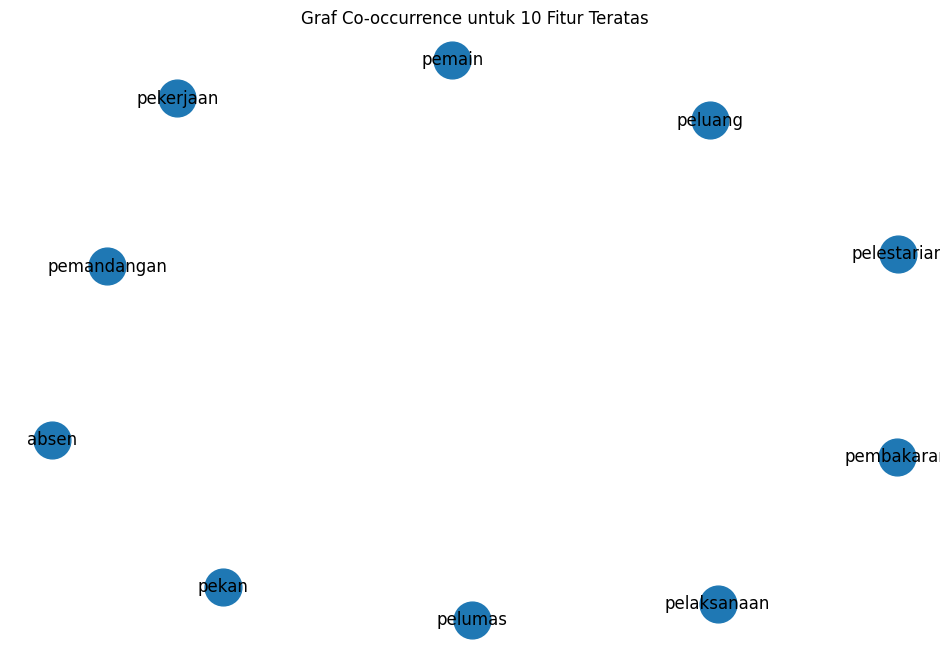

In [ ]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf Co-occurrence untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

          Node  Degree Centrality  Closeness Centrality  \
0        absen                0.0                   0.0   
1    pekerjaan                0.0                   0.0   
2   pembakaran                0.0                   0.0   
3  pemandangan                0.0                   0.0   
4       pemain                0.0                   0.0   
5      pelumas                0.0                   0.0   
6      peluang                0.0                   0.0   
7  pelestarian                0.0                   0.0   
8  pelaksanaan                0.0                   0.0   
9        pekan                0.0                   0.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0  


###**Kedua: Ambil Satu Berita**

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd

# Teks berita yang telah dirapikan
news_text_1 = """ Ini adalah PON pertama cabor Soft Tenis digelar Saya Ingin membuktikan dan bagian dari sejarah untuk membawa harum
daerah saya yaitu Sulawesi Utara dengan semaksimal mungkin meraih medali emas di Aceh ini papar petenis asal Sulawesi Utara Anadeleyda
dalam rilis kepada detikSportAna yang meraih medali perunggu SEA Games  lolos ke babak kedua usai menempati posisi kedua di poolnya
Di babak utama nanti saya akan mengeluarkan seluruh kemampuan agar bisa terus hingga ke babak final paparnyaSementara itu Damrah
selaku technical delegate Cabor Soft Tenis PON  mengapresiasi penampilan para atlet yang bekerja keras untuk mengharumkan daerahnya
masing masing. Salut kepada para atlet Soft Tennis PON tahun ini Pastinya pemain yang masuk ke babak kedua adalah pemain terbaik dari
masing provinsi Mudahan akan muncul pemain terbaik dari yang baik papar DamrahBerikut Daftar Pemain yang lolos ke babak kedua atau
besar Soft TennisPutra Bagus Angga DKI Jakarta Gusti Jaya Kusuma Jawa Timur Maulidan Aceh M Fajar Amarta DIY Marie Muhammad
Kalimantan Timur Risky Syahputra Sumatera Barat Pande Surya NTB Reza Fahlefi Jawa TengahPutri Anadeleyda K Sulut Alifa Siti Marwah
Aceh Allif Nafiiah Jawa Tengah Ha iyah Rahmah DIY Fikratus Sumbar Salsabila Kaltim Oxy Grafitasi DKI Jakarta Herafita Taher Jawa Timur """

news_text_2 = """ Menteri Koordinator Bidang Perekonomian Airlangga Hartarto Foto: Kemenko PerekonomianMenurutnya, pemerintah seharusnya
tak hanya fokus memberikan stimulus mobil listrik. Sebab, berdasarkan demand structure, kendaraan tersebut hanya menjadi mobil tambahan
atau additional car. Sementara untuk meningkatkan pasar butuh menyasar segmen first buyer.""First buyer rata-rata dipakai untuk main car.
Sebagai mobil utama berarti masyarakat harus percaya dulu soal infrastruktur pada saat mereka menggunakan kendaraan itu, harus aman dan
tenang. Paling pas saat ini adalah mobil hybrid Karena mobil hybrid itu tidak terbatas atau terpaku dengan masalah pengecasan dan masih
isi bensin. Kenapa hybrid dulu, seperti teori ayam dan telur, kita tidak mau menunggu infrastruktur dulu atau yang mana dulu. Kita
inginnya jalan barengan,"" tambahnya.Toyota soal insentif mobil hybrid Foto: IstimewaResha juga sedikit menyinggung pasar mobil hybrid
di Thailand. Pemerintah setempat tetap memberikan insentif meski penjualannya sudah cukup baik. Bahkan, insentifnya tergantung emisi
yang bisa dipangkas.Sebelumnya, di lokasi yang sama, Airlangga bilang penjualan mobil hybrid di Indonesia sudah tinggi tanpa insentif.
Sehingga, saat ini skema pembeliannya masih sama atau tanpa perubahan.""Selama ini tanpa insentif juga kan penjualannya sudah cukup baik,
demikian respons singkat Airlangga saat ditanya kemungkinan adanya insentif mobil hybrid di masa depan.Sebagai catatan, selama semester
satu 2024, penjualan mobil hybrid di Indonesia mencapai 25.791 unit. Nominal tersebut naik 49 persen dibandingkan periode yang sama tahun
lalu. """

# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_text_1, news_text_2], columns=['text'])

# Menampilkan DataFrame
print(data)


                                                text
0   Ini adalah PON pertama cabor Soft Tenis digel...
1   Menteri Koordinator Bidang Perekonomian Airla...


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)

10 Fitur Terbaik:
       Feature     Score
152     mobil  0.447404
84     hybrid  0.357923
268      yang  0.317256
56         di  0.273120
21      babak  0.266930
90   insentif  0.223702
106     kedua  0.213544
105        ke  0.213544
98       jawa  0.213544
172    pemain  0.213544


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
              mobil    hybrid      yang        di     babak  insentif  \
mobil     1.000000  1.000000  0.556870  0.813095  0.000000  1.000000   
hybrid    1.000000  1.000000  0.556870  0.813095  0.000000  1.000000   
yang      0.556870  0.556870  1.000000  0.936306  0.830600  0.556870   
di        0.813095  0.813095  0.936306  1.000000  0.582131  0.813095   
babak     0.000000  0.000000  0.830600  0.582131  1.000000  0.000000   
insentif  1.000000  1.000000  0.556870  0.813095  0.000000  1.000000   
kedua     0.000000  0.000000  0.830600  0.582131  1.000000  0.000000   
ke        0.000000  0.000000  0.830600  0.582131  1.000000  0.000000   
jawa      0.000000  0.000000  0.830600  0.582131  1.000000  0.000000   
pemain    0.000000  0.000000  0.830600  0.582131  1.000000  0.000000   

             kedua        ke      jawa    pemain  
mobil     0.000000  0.000000  0.000000  0.000000  
hybrid    0.000000  0.000000  0.000000  0.000000  
yang      0.830600  0.83060

In [ ]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
           mobil  hybrid  yang  di  babak  insentif  kedua  ke  jawa  pemain
mobil         1       1     1   1      0         1      0   0     0       0
hybrid        1       1     1   1      0         1      0   0     0       0
yang          1       1     1   1      1         1      1   1     1       1
di            1       1     1   1      1         1      1   1     1       1
babak         0       0     1   1      1         0      1   1     1       1
insentif      1       1     1   1      0         1      0   0     0       0
kedua         0       0     1   1      1         0      1   1     1       1
ke            0       0     1   1      1         0      1   1     1       1
jawa          0       0     1   1      1         0      1   1     1       1
pemain        0       0     1   1      1         0      1   1     1       1


In [ ]:
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)


Degree:
 {'mobil': 6, 'hybrid': 6, 'yang': 11, 'di': 11, 'babak': 8, 'insentif': 6, 'kedua': 8, 'ke': 8, 'jawa': 8, 'pemain': 8}

Closeness Centrality:
 {'mobil': 0.6428571428571429, 'hybrid': 0.6428571428571429, 'yang': 1.0, 'di': 1.0, 'babak': 0.75, 'insentif': 0.6428571428571429, 'kedua': 0.75, 'ke': 0.75, 'jawa': 0.75, 'pemain': 0.75}

Betweenness Centrality:
 {'mobil': 0.0, 'hybrid': 0.0, 'yang': 0.20833333333333331, 'di': 0.20833333333333331, 'babak': 0.0, 'insentif': 0.0, 'kedua': 0.0, 'ke': 0.0, 'jawa': 0.0, 'pemain': 0.0}


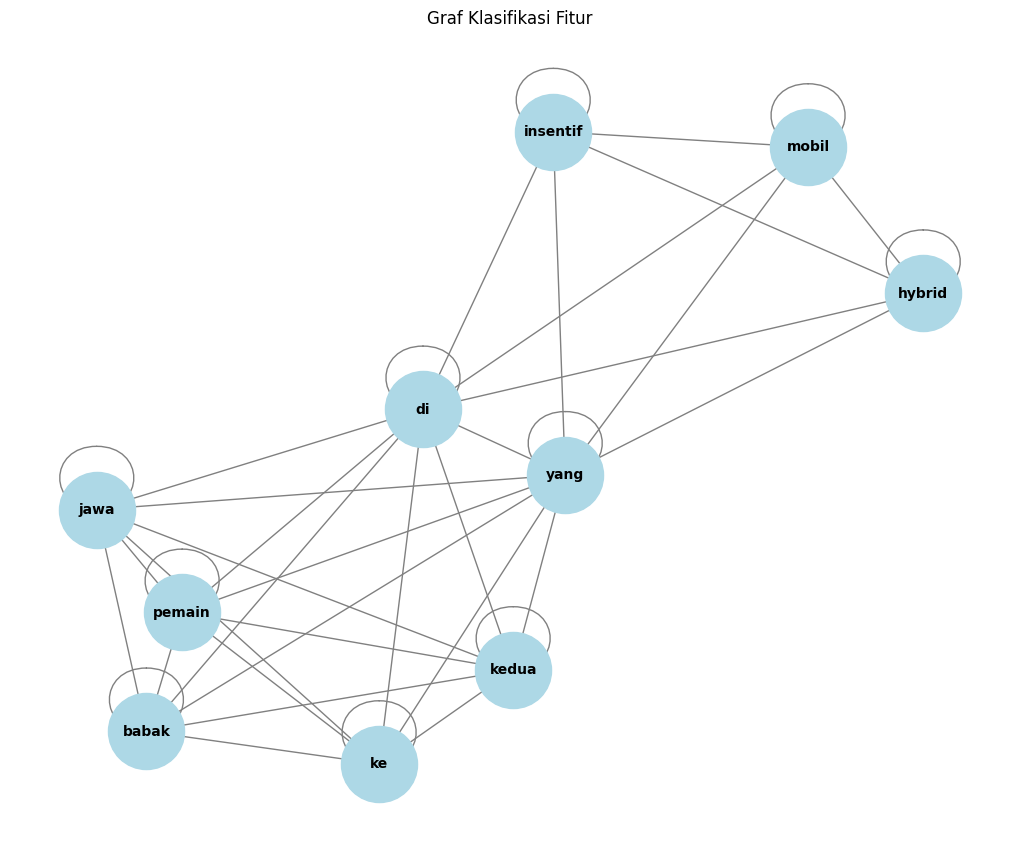

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menggambar graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Menggunakan spring layout untuk penempatan node
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Graf Klasifikasi Fitur")
plt.show()